<a href="https://colab.research.google.com/github/IvanCampos11/Build-Week-Project/blob/master/AppStorePopularity_BuildWeek_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pylab import rcParams

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
android = pd.read_csv('https://raw.githubusercontent.com/IvanCampos11/Build-Week-Project/master/googleplaystore.csv')
apple = pd.read_csv('https://github.com/IvanCampos11/Build-Week-Project/raw/master/Applestore.csv')

In [3]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
android.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

In [5]:
android.dropna(how ='any', inplace = True)

In [6]:
android.isnull().sum().sort_values(ascending=False)

Android Ver       0
Current Ver       0
Last Updated      0
Genres            0
Content Rating    0
Price             0
Type              0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

In [7]:
android = android.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1)

In [8]:
android

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


In [9]:
apple.isnull().sum().sort_values(ascending=False)

vpp_lic             0
rating_count_ver    0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
user_rating         0
lang.num            0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
Unnamed: 0          0
dtype: int64

In [10]:
apple = apple.drop(['id','currency','rating_count_ver','user_rating_ver','ipadSc_urls.num','vpp_lic','ver','sup_devices.num'], axis=1)

In [11]:
android['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating: GooglePlay Store')

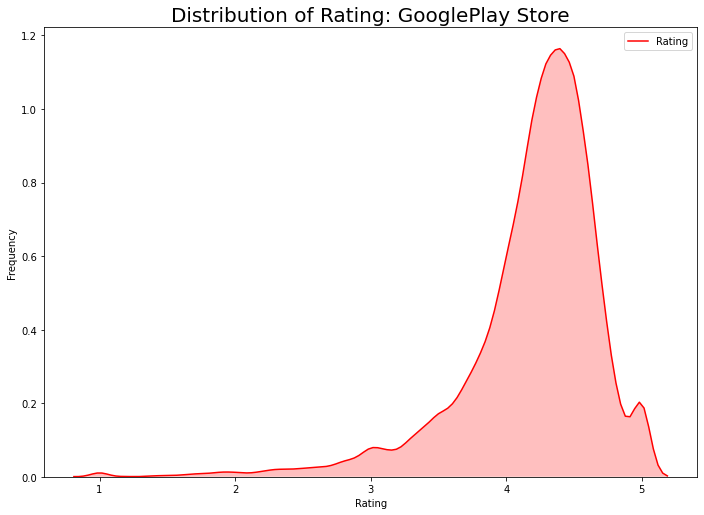

In [12]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(android.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating: GooglePlay Store',size = 20)

In [13]:
android['Reviews'] = android['Reviews'].astype(int)

Text(0.5, 1.0, 'Distribution of Reveiw: GooglePlay')

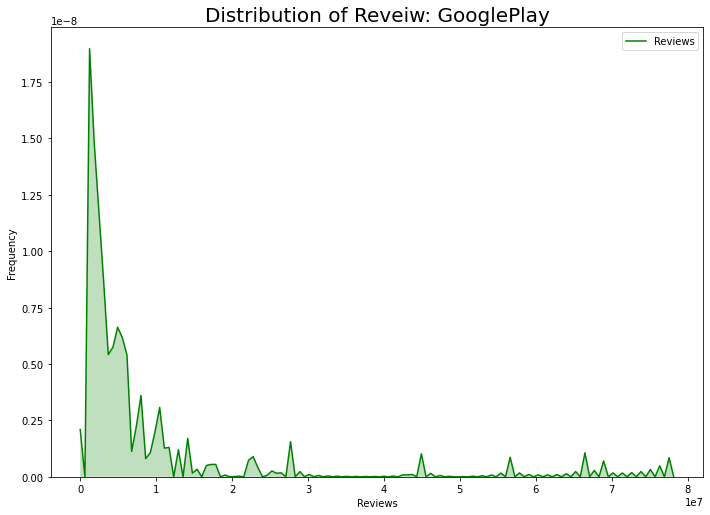

In [14]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(android.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw: GooglePlay',size = 20)

Text(0.5, 1.0, 'Rating VS Reveiws: GooglePlay')

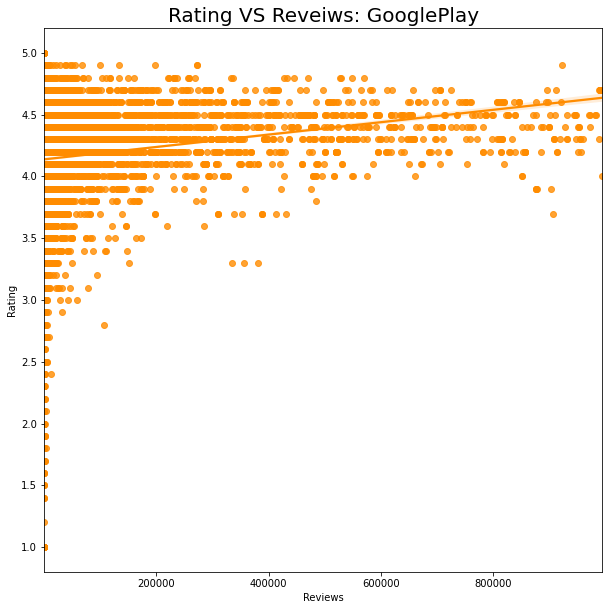

In [15]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=android[android['Reviews']<1000000]);
plt.title('Rating VS Reveiws: GooglePlay',size = 20)

In [16]:
fig = go.Figure(data=go.Histogram(x=apple['prime_genre'], y=apple['rating_count_tot']))
fig.update_layout(title="Unique quantity of apps(by category): Apple",xaxis_title="Category",yaxis_title="Quantity of unique apps",font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
fig.show()

In [17]:
fig = go.Figure(data=go.Histogram(x=android['Category']))
fig.update_layout(title="Unique quantity of apps(by category): GooglePlayStore",xaxis_title="Category",yaxis_title="Quantity of unique apps",font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
fig.show()

In [18]:
apple['cont_rating'] = apple['cont_rating'].str.replace('+', '')
apple['cont_rating'] = apple['cont_rating'].astype(int)

In [19]:
apple.head()

,Unnamed: 0,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,lang.num
0,1,PAC-MAN Premium,100788224,3.99,21292,4.0,4,Games,10
1,2,Evernote - stay organized,158578688,0.00,161065,4.0,4,Productivity,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4,Weather,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12,Shopping,9
4,5,Bible,92774400,0.00,985920,4.5,4,Reference,45


In [20]:
indexNames = apple['user_rating'][ apple['user_rating'] == 0 ].index
apple['user_rating'].drop(indexNames , inplace=True)

Text(0.5, 1.0, 'Distribution of Rating: Apple')

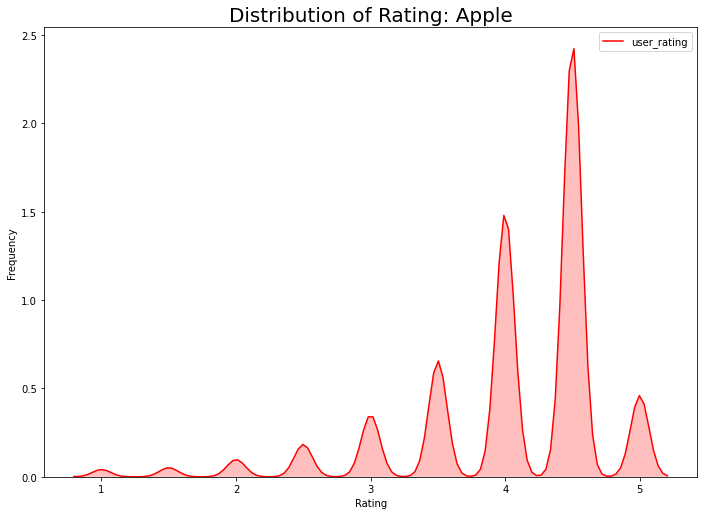

In [21]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(apple.user_rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating: Apple',size = 20)

Text(0.5, 1.0, 'Distribution of Reveiw: Apple')

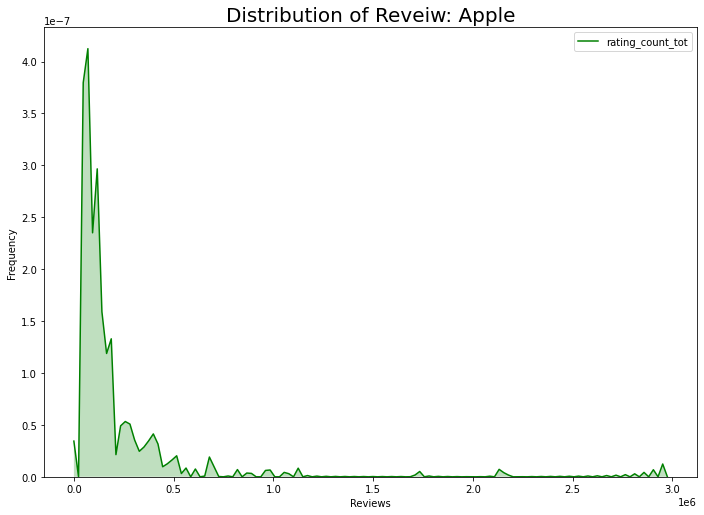

In [22]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(apple.rating_count_tot, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw: Apple',size = 20)

Text(0.5, 1.0, 'Rating VS Reveiws: Apple')

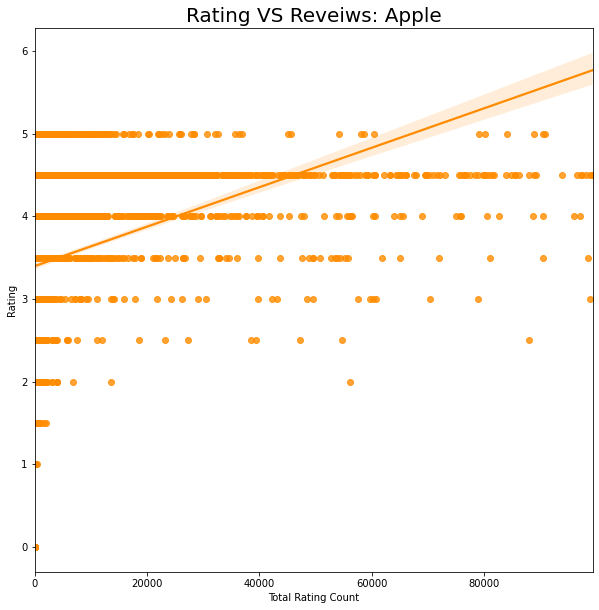

In [23]:
plt.figure(figsize = (10,10))
sns.regplot(x="rating_count_tot", y="user_rating", color = 'darkorange',data=apple[apple['rating_count_tot']<100000]);
plt.ylabel('Rating')
plt.xlabel('Total Rating Count')
plt.title('Rating VS Reveiws: Apple',size = 20)

In [24]:
top_free_games = apple[(apple["prime_genre"]=="Games") & (apple["price"]==0)]
top_free_games = top_free_games.drop(['size_bytes','lang.num','Unnamed: 0'], axis=1)
top_free_games.sort_values("rating_count_tot", axis = 0, ascending=False,inplace=True)
top_free_games.head(10)

,track_name,price,rating_count_tot,user_rating,cont_rating,prime_genre
1346,Clash of Clans,0.0,2130805,4.5,9,Games
707,Temple Run,0.0,1724546,4.5,9,Games
1493,Candy Crush Saga,0.0,961794,4.5,4,Games
275,Angry Birds,0.0,824451,4.5,4,Games
1246,Subway Surfers,0.0,706110,4.5,9,Games
343,Solitaire,0.0,679055,4.5,4,Games
990,CSR Racing,0.0,677247,4.5,4,Games
3042,Crossy Road - Endless Arcade Hopper,0.0,669079,4.5,9,Games
1634,Injustice: Gods Among Us,0.0,612532,4.5,12,Games
1218,Hay Day,0.0,567344,4.5,4,Games


In [25]:
top_paid_games = apple[(apple["prime_genre"]=="Games") & (apple["price"]!=0)]
top_paid_games = top_paid_games.drop(['size_bytes','lang.num','Unnamed: 0'], axis=1)
top_paid_games.sort_values("rating_count_tot", axis = 0, ascending=False,inplace=True)
top_paid_games.head(10)

,track_name,price,rating_count_tot,user_rating,cont_rating,prime_genre
348,Fruit Ninja Classic,1.99,698516,4.5,4,Games
1182,Clear Vision (17+),0.99,541693,4.5,17,Games
1052,Minecraft: Pocket Edition,6.99,522012,4.5,9,Games
302,Plants vs. Zombies,0.99,426463,5.0,9,Games
109,Doodle Jump,0.99,395261,4.5,4,Games
1114,Draw Something,2.99,360974,4.5,4,Games
498,Infinity Blade,0.99,326482,5.0,12,Games
1877,Geometry Dash,1.99,266440,5.0,4,Games
698,Tiny Wings,0.99,219418,4.5,4,Games
171,Traffic Rush,0.99,213092,3.5,9,Games


In [26]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [46]:
top_free_android = android[(android["Category"]=="FAMILY") & (android["Type"]=='Free')]
top_free_android.sort_values("Reviews", axis = 0, ascending=False,inplace=True)
top_free_android = top_free_android.drop(['Size','Installs'], axis=1)
top_free_android.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Type,Price,Content Rating,Genres
3986,Clash of Clans,FAMILY,4.6,44881447,Free,0,Everyone 10+,Strategy
3987,Clash Royale,FAMILY,4.6,23125280,Free,0,Everyone 10+,Strategy
3994,Candy Crush Saga,FAMILY,4.4,22419455,Free,0,Everyone,Casual
3888,My Talking Tom,FAMILY,4.5,14885236,Free,0,Everyone,Casual
3879,Pou,FAMILY,4.3,10483141,Free,0,Everyone,Casual
2050,Minion Rush: Despicable Me Official Game,FAMILY,4.5,10216997,Free,0,Everyone 10+,Casual;Action & Adventure
2090,Minion Rush: Despicable Me Official Game,FAMILY,4.5,10216997,Free,0,Everyone 10+,Casual;Action & Adventure
4036,Minion Rush: Despicable Me Official Game,FAMILY,4.5,10214862,Free,0,Everyone 10+,Casual;Action & Adventure
3975,Hay Day,FAMILY,4.5,10053186,Free,0,Everyone,Casual
3910,My Talking Angela,FAMILY,4.5,9876369,Free,0,Everyone,Casual


In [47]:
top_paid_android = android[(android["Category"]=="FAMILY") & (android["Type"]=='Paid')]
top_paid_android.sort_values("Reviews", axis = 0, ascending=False,inplace=True)
top_paid_android = top_paid_android.drop(['Size','Installs'], axis=1)
top_paid_android.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Type,Price,Content Rating,Genres
2241,Minecraft,FAMILY,4.5,2376564,Paid,$6.99,Everyone 10+,Arcade;Action & Adventure
4347,Minecraft,FAMILY,4.5,2375336,Paid,$6.99,Everyone 10+,Arcade;Action & Adventure
8860,Bloons TD 5,FAMILY,4.6,190086,Paid,$2.99,Everyone,Strategy
9678,Where's My Water?,FAMILY,4.7,188740,Paid,$1.99,Everyone,Puzzle;Brain Games
2242,Card Wars - Adventure Time,FAMILY,4.3,129603,Paid,$2.99,Everyone 10+,Card;Action & Adventure
6936,Hitman GO,FAMILY,4.6,84114,Paid,$0.99,Everyone 10+,Puzzle
5627,Five Nights at Freddy's 2,FAMILY,4.6,73919,Paid,$2.99,Teen,Strategy
4260,Cut the Rope GOLD,FAMILY,4.6,61264,Paid,$0.99,Everyone,Puzzle
9154,NBA JAM by EA SPORTS™,FAMILY,4.3,56444,Paid,$4.99,Everyone,Sports;Action & Adventure
4556,Day R Premium,FAMILY,4.8,51068,Paid,$4.99,Teen,Role Playing
